# Logistic regression in Scikitlearn
* We'll explore a Logistic Regression model in Scikitlearn
* We'll talk about how to model debug etc. 
* We'll do some feature engineering etc.

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [7]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=['age', 'workclass', 'fnlwgt', 
                'education-categorical', 'educ', 
                'marital-status', 'occupation',
                'relationship', 'race', 'sex', 
                'captial-gain', 'capital-loss', 
                'hours', 'native-country', 
                'income'])

# Feature Engineering 
* We'll generate some features here.
* We want to predict income greater than 50K.
* This is a typical business like problem. 
* It could ad-revenue above a certain type, it could be 'is this person a student?, etc etc
* Logistic regression is not as *sexy* as deep learning but it's a powerful model

In [10]:

data = data[~pd.isnull(data['income'])]
data[data['native-country']==" United-States"]

,age,workclass,fnlwgt,education-categorical,educ,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


* Standard trick with features, is to add squares. 
* I know based on other studies that income increases proportional to age squared. 
* Your earnings don't increase in a *linear* fashion.
* This is a naive feature, but a decent one to make. 
* Feature engineering is a complicated topic but I just wanted to share some good rules of thumb here. 

In [11]:
income = 1 * (data['income'] == " >50K")
age2 = np.square(data['age'])

We'll restrict our search space a bit, to only those variables or features we think are useful.
* We could use an explained variance trick or some sort of machine learning feature selection trick to do this.
* We'll assume that we know this from **domain knowledge** or just experience. 

In [12]:
data = data[['age', 'educ', 'hours']]
data['age2'] = age2
data['income'] = income

# Let's explore the data a bit. 

In [13]:
income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

# Exploring the data
* Let us get a feel for the parameters.
* We see that age is a tailed distribution.
* Certainly not Gaussian! We don't see much of a correlation between many of the features, with the exception of Age and Age2.
* Hours worked has some interesting behaviour. How would one describe this distribution?

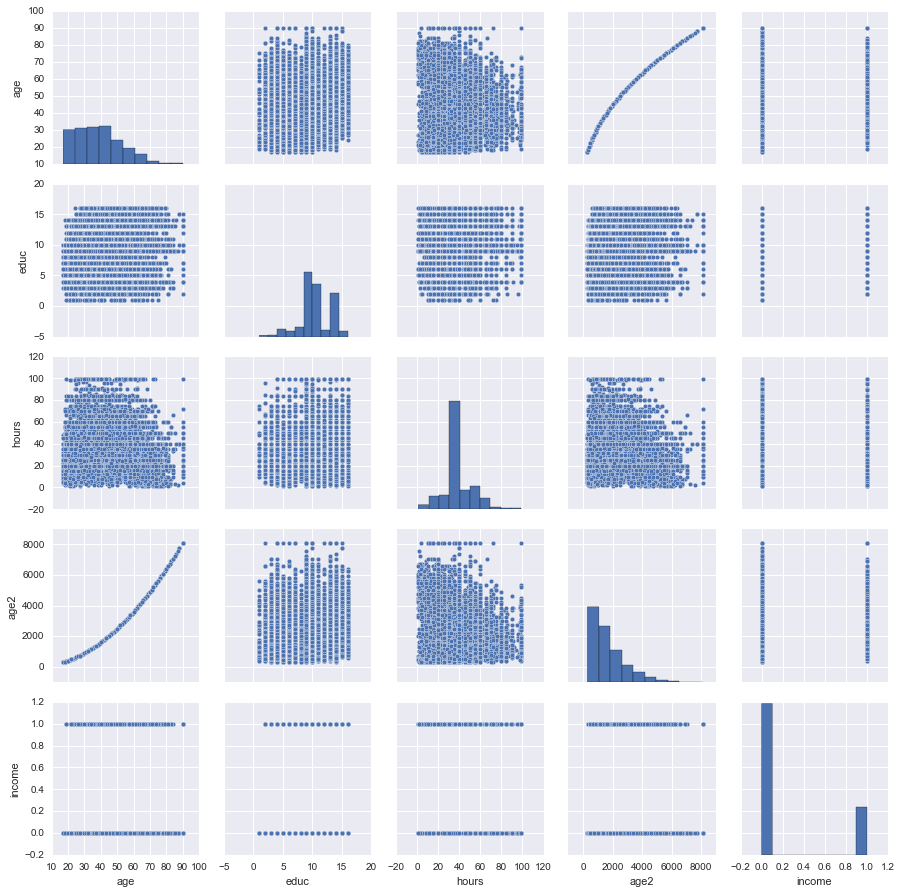

In [14]:
import seaborn as seaborn
g = seaborn.pairplot(data)

In [31]:
logreg = linear_model.LogisticRegression(C=1e5)

age2 = np.square(data['age'])
data = data[['age', 'educ', 'hours']]
data['age2'] = age2
data['income'] = income
X = data[['age', 'age2', 'educ', 'hours']]
Y = data['income']
logreg.fit(X, Y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
# check the accuracy on the training set
logreg.score(X, Y)



0.79303461195909219

In [33]:

Y.mean()


0.24080955744602439

So we've decent predictions but not great ones. Only 24% of the class earns more than 50k, which means that you could obtain 76% accuracy by always predicting "no". So we're doing better than the null error rate but not by much. 
Let's examine the coefficients and see what we learn. 

In [34]:
g = np.transpose(logreg.coef_)
pd.DataFrame(list(zip(X.columns, g )))

,0,1
0,age,[0.162458514116]
1,age2,[-0.00138241828468]
2,educ,[0.283606412852]
3,hours,[0.0290797158473]


# Classical Machine Learning technique - using a training set and testing set. 

In [35]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model2 = linear_model.LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[0 0 0 ..., 1 0 0]


In [37]:

# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[ 0.85986473  0.14013527]
 [ 0.75614576  0.24385424]
 [ 0.82441467  0.17558533]
 ..., 
 [ 0.48120856  0.51879144]
 [ 0.79467429  0.20532571]
 [ 0.92966606  0.07033394]]


# Model evaluation.
* We can look at the model as a black box.
* We can evaluate it and score it.
* We can also probably use something like Hyperparameter tuning or something like a Grid search to improve our results. 